In [1]:
from skimage.segmentation import watershed, felzenszwalb
from skimage.filters import sobel
import time
from skimage import io as skio
import pandas as pd
from pathlib import Path
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.filters import rank
from scipy import ndimage as ndi
from skimage.morphology import disk
import sklearn.metrics
import os
import torch

def load_dataset(dataset_dir):
    dataset_list = []
    # Note: It's very important to load the images in the correct numerical order!
    # print(
    for image_file in list(sorted(Path(dataset_dir).glob("*.png"), key=lambda filename: int(filename.name.rstrip(".png")))):
        print(image_file)
        dataset_list.append(cv2.imread(str(image_file), cv2.IMREAD_GRAYSCALE))
    return np.stack(dataset_list, axis=0)

labels_train = pd.read_csv("Y_train.csv", index_col=0).T
data_train = load_dataset("X_train")
data_test = load_dataset("X_test")

X_train/0.png
X_train/1.png
X_train/2.png
X_train/3.png
X_train/4.png
X_train/5.png
X_train/6.png
X_train/7.png
X_train/8.png
X_train/9.png
X_train/10.png
X_train/11.png
X_train/12.png
X_train/13.png
X_train/14.png
X_train/15.png
X_train/16.png
X_train/17.png
X_train/18.png
X_train/19.png
X_train/20.png
X_train/21.png
X_train/22.png
X_train/23.png
X_train/24.png
X_train/25.png
X_train/26.png
X_train/27.png
X_train/28.png
X_train/29.png
X_train/30.png
X_train/31.png
X_train/32.png
X_train/33.png
X_train/34.png
X_train/35.png
X_train/36.png
X_train/37.png
X_train/38.png
X_train/39.png
X_train/40.png
X_train/41.png
X_train/42.png
X_train/43.png
X_train/44.png
X_train/45.png
X_train/46.png
X_train/47.png
X_train/48.png
X_train/49.png
X_train/50.png
X_train/51.png
X_train/52.png
X_train/53.png
X_train/54.png
X_train/55.png
X_train/56.png
X_train/57.png
X_train/58.png
X_train/59.png
X_train/60.png
X_train/61.png
X_train/62.png
X_train/63.png
X_train/64.png
X_train/65.png
X_train/66.png
X_tra

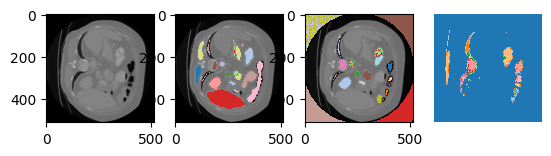

In [11]:
# Let's display some data
# Here is a function to display side by side a slide and a segmented mask
def plot_slice_seg(i, slice_images, segs):
    slice_image = slice_images[i]
    seg = segs.iloc[i].values.reshape((512,512))
    seg_SAM = np.load(os.path.join("SAM_masks", str(i)+".npy"))
    seg_base = np.load(os.path.join("baseline_masks", str(i)+".npy"))
    fig, axes = plt.subplots(1, 4)
    axes[0].imshow(slice_image, cmap="gray")
    axes[1].imshow(slice_image, cmap="gray")
    seg_masked = np.ma.masked_where(seg.reshape((512,512)) == 0, (seg.reshape((512,512))))
    axes[1].imshow(seg_masked, cmap="tab20")
    plt.axis("off")
    
    axes[2].imshow(slice_image, cmap="gray")
    seg_SAM_masked = np.ma.masked_where(seg_SAM.reshape((512,512)) == 0, (seg_SAM.reshape((512,512))))
    axes[2].imshow(seg_SAM_masked, cmap="tab20")
    plt.axis("off")

    axes[3].imshow(slice_image, cmap="gray")
    seg_base_masked = np.ma.masked_where(seg_base.reshape((512,512)) == 0, (seg_base.reshape((512,512))))
    axes[3].imshow(seg_base_masked, cmap="tab20")
    plt.axis("off")

# Let's try it on a slide and ites segmentation mask
# Note: we have to reshape the rows of the dataframe into a 512*512 matrix
i = 2
plot_slice_seg(i, data_train, labels_train)